## 3. Selenium의 중급 사용법
1. 파일 업로드
1. 스크래핑
1. 자동화
1. 이미지 크롤링
1. headless
1. header에 fackagent 설정

### 3.1 파일 업로드
- google vision api 페이지
- vision api 페이로 이동
- iframe으로 frame을 수정
- 이미지 파일을 업로드
- 웹데이터와 도큐먼트 데이터를 수집

In [2]:
from selenium import webdriver

In [3]:
# 구글 비전 api 페이지 이동
url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)

In [4]:
# iframe 영역으로 스크롤 이동
driver.execute_script('$("html, body").animate({ scrollTop: $("#vision_demo_section > iframe").offset().top - 128 }, 1000);')

In [5]:
# iframe 영역으로 frame 변경
iframe = driver.find_element_by_css_selector("#vision_demo_section > iframe")
driver.switch_to.frame(iframe)

In [6]:
# 메인프레임으로 변경
# driver.switch_to_default_content()

In [10]:
# 파일업로드
# 파일 경로를 쓸때는 절대경로로 사용해야 합니다.
# /, \\
import os
file_path = os.getcwd() + "/dog.png"
print(file_path)

driver.find_element_by_css_selector("#input").send_keys(file_path)

/Users/radajin/Documents/fastcampus/miraeasset/day4/notebook/dss/dog.png


In [6]:
# 웹데이터 가져오기 1
# time.sleep(10)
# driver.find_element_by_css_selector("#webDetection").click()

In [7]:
# 웹데이터 가져오기 2
def check_loading(driver):
    result = driver.find_element_by_css_selector("#loading").get_attribute('hidden')
    return True if result == 'true' else False

for sec in range(20):
    time.sleep(1)
    if check_loading(driver):
        driver.find_element_by_css_selector("#webDetection").click()
        print("done.. {} sec".format(sec + 1))
        break;
    print("loading.. {} sec".format(sec + 1))

loading.. 1 sec
loading.. 2 sec
loading.. 3 sec
loading.. 4 sec
loading.. 5 sec
loading.. 6 sec
done.. 7 sec


In [8]:
results = driver.find_elements_by_css_selector("#card .container > .row")[:5]
for result in results:
    name = result.find_element_by_css_selector('.name').text
    score = result.find_element_by_css_selector('.score').text
    print(name , score)

Puppy 1.09455
Pug 1.03854
French Bulldog 0.92746
Bulldog 0.84779
Yorkshire Terrier 0.77682


In [9]:
# 문자열 데이터 가져오기
driver.find_element_by_css_selector("#fullTextAnnotation").click()

In [10]:
fieldsets = driver.find_elements_by_css_selector(".page > .container.style-scope.vs-document > fieldset")
len(fieldsets)

2

In [11]:
documents = [] # 문장 2개가 들어갑니다.

for fieldset in fieldsets:
    words = fieldset.find_elements_by_css_selector\
    (".container .word")
    word_list = []
    for word in words:
        word = word.text.replace(" ","").replace("'","")
        word_list.append(word)
    documents.append(" ".join(word_list))

documents

['In the dog house', ' 인기를 잃다 , 면목을 잃다']

In [12]:
driver.quit()

### 3.2 스크래핑
- gmarke 베스트 200 데이터 수집후 pandas dataframe으로 출력
- http://corners.gmarket.co.kr/Bestsellers

In [13]:
driver = webdriver.Chrome() 
url = "http://corners.gmarket.co.kr/Bestsellers"
driver.get(url)

In [41]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")

dict_list = []

for item in items:
    dict_list.append({
        "title" : item.find_element_by_css_selector(".itemname").text,
        "link" : item.find_element_by_css_selector(".itemname").get_attribute("href"),
        "o-price": item.find_element_by_css_selector(".o-price").text.replace(",","")[:-1],
        "s-price": item.find_element_by_css_selector(".s-price").text.split(" ")[0].replace(",","")[:-1],
    })

driver.quit()
    
df = pd.DataFrame(dict_list)
df.tail()

link o-price s-price  \
195  http://item.gmarket.co.kr/Item?goodscode=14948...    1500     900   
196  http://item.gmarket.co.kr/Item?goodscode=19712...   24000   19800   
197  http://item.gmarket.co.kr/Item?goodscode=67949...   27000   23900   
198  http://item.gmarket.co.kr/Item?goodscode=12253...   99600   29900   
199  http://item.gmarket.co.kr/Item?goodscode=97107...   33000   23800   

                                    title  
195  [GS25](스마일클럽) GS25 Y)더진한스누피커피우유500ML  
196           가을 신상 롱티/원피스 빅사이즈 여성의류 허밍퍼플  
197    [네스카페]무료배송 + 돌체구스토 캡슐커피3박스 돌체구스토캡슐  
198       [아키클래식]브랜드 가을운동화/스니커즈/슬립온/신발/커플  
199  [잘풀리는집]잘풀리는집 순수 프리미엄 30mx30롤 리뉴얼/ 2팩

In [42]:
# 컬럼 재정렬
df = df[["title","link","o-price","s-price"]]
df.tail()

title  \
195  [GS25](스마일클럽) GS25 Y)더진한스누피커피우유500ML   
196           가을 신상 롱티/원피스 빅사이즈 여성의류 허밍퍼플   
197    [네스카페]무료배송 + 돌체구스토 캡슐커피3박스 돌체구스토캡슐   
198       [아키클래식]브랜드 가을운동화/스니커즈/슬립온/신발/커플   
199  [잘풀리는집]잘풀리는집 순수 프리미엄 30mx30롤 리뉴얼/ 2팩   

                                                  link o-price s-price  
195  http://item.gmarket.co.kr/Item?goodscode=14948...    1500     900  
196  http://item.gmarket.co.kr/Item?goodscode=19712...   24000   19800  
197  http://item.gmarket.co.kr/Item?goodscode=67949...   27000   23900  
198  http://item.gmarket.co.kr/Item?goodscode=12253...   99600   29900  
199  http://item.gmarket.co.kr/Item?goodscode=97107...   33000   23800

In [43]:
# (quiz) o-price에 비어있는 데이터 확인 
is_nodata = df["o-price"] == ""
tmp_df = df[is_nodata]
print(len(tmp_df))
tmp_df.tail()

14


title  \
167       [엘르]로베르따/엘르 방송HIT 가방세트 단독 3만원대 균일가   
171              드디어 입점 반건조 업계1위 오바다 박상민 오징어   
173        나영이농장 첫 수확 맛좋은 감귤 5kg(2S~M) 무공해 귤   
178                휴스톰 무선물걸레청소기 HS-9000/당일발송   
192  [도리도리]도리도리 아기물티슈 100매캡 10팩+10팩 식약처 cGMP   

                                                  link o-price s-price  
167  http://item.gmarket.co.kr/Item?goodscode=14996...           38900  
171  http://item.gmarket.co.kr/Item?goodscode=14704...           21900  
173  http://item.gmarket.co.kr/Item?goodscode=72386...            9900  
178  http://item.gmarket.co.kr/Item?goodscode=14704...          151900  
192  http://item.gmarket.co.kr/Item?goodscode=11892...           12900

In [44]:
# (quiz) 비어있는 o-price에 s-price 대입
df["o-price"][is_nodata] = df["s-price"][is_nodata]

In [46]:
# 채워 졌는지 확인
df[is_nodata].tail()

title  \
167       [엘르]로베르따/엘르 방송HIT 가방세트 단독 3만원대 균일가   
171              드디어 입점 반건조 업계1위 오바다 박상민 오징어   
173        나영이농장 첫 수확 맛좋은 감귤 5kg(2S~M) 무공해 귤   
178                휴스톰 무선물걸레청소기 HS-9000/당일발송   
192  [도리도리]도리도리 아기물티슈 100매캡 10팩+10팩 식약처 cGMP   

                                                  link o-price s-price  
167  http://item.gmarket.co.kr/Item?goodscode=14996...   38900   38900  
171  http://item.gmarket.co.kr/Item?goodscode=14704...   21900   21900  
173  http://item.gmarket.co.kr/Item?goodscode=72386...    9900    9900  
178  http://item.gmarket.co.kr/Item?goodscode=14704...  151900  151900  
192  http://item.gmarket.co.kr/Item?goodscode=11892...   12900   12900

In [48]:
df.head()

title  \
0       [종근당 건강]특가 슈퍼비젼 멀티비타민 6개월 비타민 종합비타민   
1                 당일바리 포항 반건조 오징어 10마리 /피데기   
2                 더다다/원피스형 롱티/신상/루즈/박시/빅사이즈   
3                     티메이 원피스 블라우스 스커트 롱원피스   
4  [G7]G7 블랙 인스턴트 커피 100T+100T 총200T/베트남/원두   

                                                link o-price s-price  
0  http://item.gmarket.co.kr/Item?goodscode=25446...   25000    9900  
1  http://item.gmarket.co.kr/Item?goodscode=14836...   39900   17900  
2  http://item.gmarket.co.kr/Item?goodscode=62724...   32900    9900  
3  http://item.gmarket.co.kr/Item?goodscode=12802...   33000    9900  
4  http://item.gmarket.co.kr/Item?goodscode=24273...   20000   11900

In [59]:
# (quiz) 할인율 컬럼을 추가하고 할인률이 높은 순으로 내림차순 하기
df["discount_rate"] = round( (1 - (df["s-price"].astype('int') / df["o-price"].astype('int'))) * 100, 2 )
sorted_df = df.sort_values("discount_rate", ascending=False)
sorted_df.reset_index(drop=True, inplace=True)
sorted_df[50:60]

title  \
50       더클로 빅사이즈4XL 기모레깅스/롱치마/쉬폰/밴딩팬츠   
51        기모 티셔츠/트레이닝/가을등산바지/남성/작업복/팬츠   
52     [다샵]3중직 벽걸이 스탠드 에어컨커버 제습기/선풍기커버   
53             뷰하우스 4계절 암막커튼 1+1(2장)세트   
54  [크록스]크록스 18FH 털신 부츠 깜짝특가 (G181013)   
55               [웨스트우드]캠핑/낚시/아웃도어 특가전   
56           (체리빌레)가을신상 예쁜 원피스/하객룩/플라워   
57         브리치x럭키567 가을신상 티셔츠 /원피스/스커트   
58         디프니 가을신상~셔츠/블라우스/원피스/패턴/데일리   
59                    래빗 코튼 상하의 홈웨어 세트   

                                                 link o-price s-price  \
50  http://item.gmarket.co.kr/Item?goodscode=50672...   19600    5900   
51  http://item.gmarket.co.kr/Item?goodscode=80181...   19600    5900   
52  http://item.gmarket.co.kr/Item?goodscode=50940...   22900    6900   
53  http://item.gmarket.co.kr/Item?goodscode=14553...   56000   16900   
54  http://item.gmarket.co.kr/Item?goodscode=78241...   99000   29900   
55  http://item.gmarket.co.kr/Item?goodscode=14509...   96000   29000   
56  http://item.gmarket.co.kr/Item?goodscode=78724...   55900   16900   
57  http://item.gmarket.co.kr/Item?goodscode=13451...   45900   13900   
58  http://item.gmarket.co.kr/Item?goodscode=18147...   48900   14900   
59  http://item.gmarket.co.kr/Item?goodscode=15022...   25900    7900   

    discount_rate  
50          69.90  
51          69.90  
52          69.87  
53          69.82  
54          69.80  
55          69.79  
56          69.77  
57          69.72  
58          69.53  
59          69.50

## 3.3 자동화
- https://radajin661456067.wordpress.com/
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글을 작성
    - 댓글 작성 레이어을 클릭
    - 댓글 작성
    - 이메일, 이름 추가
    - 댓글 작성 버튼 클릭

In [1]:
# 브라우져 열고 워드프레스 페이지로 이동
url = "https://radajin661456067.wordpress.com/"
driver = webdriver.Chrome()
driver.get(url)

In [2]:
# 게시물 링크 데이터 수집
links = []
articles = driver.find_elements_by_css_selector("#main > article")
for article in articles:
    links.append(
        article.find_element_by_css_selector(".entry-header > .entry-title > a").get_attribute("href")
    )
links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

In [3]:
# 링크 이동
driver.get(links[0])

In [4]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [5]:
# 댓글 작성 영역 클릭
driver.find_element_by_css_selector("#comment-form-comment").click()

In [6]:
# 댓글 작성
driver.find_element_by_css_selector("#comment").send_keys("데사스 플러스 1기")

In [7]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [8]:
# 이메일 이름 정보 입력
# email, author
# clear() 해당 엘리먼트의 value 값을 삭제
driver.find_element_by_css_selector("#email").clear()
driver.find_element_by_css_selector("#email").send_keys("pdj1224@daum.net")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("asdf")

In [9]:
# 작성버튼을 클릭
driver.find_element_by_css_selector('#comment-submit').click()

In [10]:
# 브라우져 종료
driver.quit()

In [11]:
# 함수로 작성
import time

def make_driver(url):
    driver = webdriver.Chrome()
    driver.get(url)
    return driver
    
def get_links(driver):
    links = []
    articles = driver.find_elements_by_css_selector("#main > article")
    for article in articles:
        links.append(
            article.find_element_by_css_selector(".entry-title > a").get_attribute("href")
        )
    return links

def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    
    # 댓글 작성 영역 클릭
    driver.find_element_by_css_selector("#comment-form-comment").click()
    time.sleep(1)
    
    # 댓글 작성
    driver.find_element_by_css_selector("#comment").send_keys(msg)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    
    # 이메일 이름 정보 입력
    driver.find_element_by_css_selector("#email").clear()
    driver.find_element_by_css_selector("#email").send_keys(email)
    time.sleep(1)
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)
    time.sleep(1)
    driver.find_element_by_css_selector('#comment-submit').click()

In [12]:
driver = make_driver("https://radajin661456067.wordpress.com/")
links = get_links(driver)

In [13]:
users = [
    {"name":"park1", "email":"pdj1224@daum.net"},
    {"name":"park2", "email":"1221pdj@naver.com"},
]
msgs = ["Hello", "World"]

# 3중 for문
for user in users:
    for msg in msgs:
        for link in links:
            print(user["email"], user["name"], msg, end=" - ")
            try:
                write_comment(driver, link, msg, user["email"], user["name"])
                print("성공")
            except:
                print("실패")

driver.quit()

pdj1224@daum.net park1 Hello - 성공
pdj1224@daum.net park1 Hello - 성공
pdj1224@daum.net park1 World - 성공
pdj1224@daum.net park1 World - 성공
1221pdj@naver.com park2 Hello - 성공
1221pdj@naver.com park2 Hello - 성공
1221pdj@naver.com park2 World - 성공
1221pdj@naver.com park2 World - 성공


### 3.4 이미지 크롤링
- youtube 영상을 이미지로 스크린샷 하기
- https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s
- pillow
    - 이미지를 저장하고 썸네일을 만들거나 특정 위치의 이미지를 자를때 사용되는 파이썬 패키지
    - http://pillow.readthedocs.io/en/3.1.x/reference/Image.html
    - 설치
        - mac : `$ pip3 install pillow`
        - windows : `$ conda install -c anaconda pillow`

In [15]:
from PIL import Image as pil

### 3.4.1 이미지 스크린샷

In [16]:
# 한장의 이미지 스크린샷
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
driver.save_screenshot("screenshot.png")
driver.quit()    

In [18]:
# 1초 간격으로 여러개의 이미지를 스크린샷
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"
driver = webdriver.Chrome()
driver.get(url)
for idx in range(5):
    time.sleep(1)
    driver.save_screenshot("screenshot_" + str(idx) + ".png")
driver.quit()    

(2400, 1440)


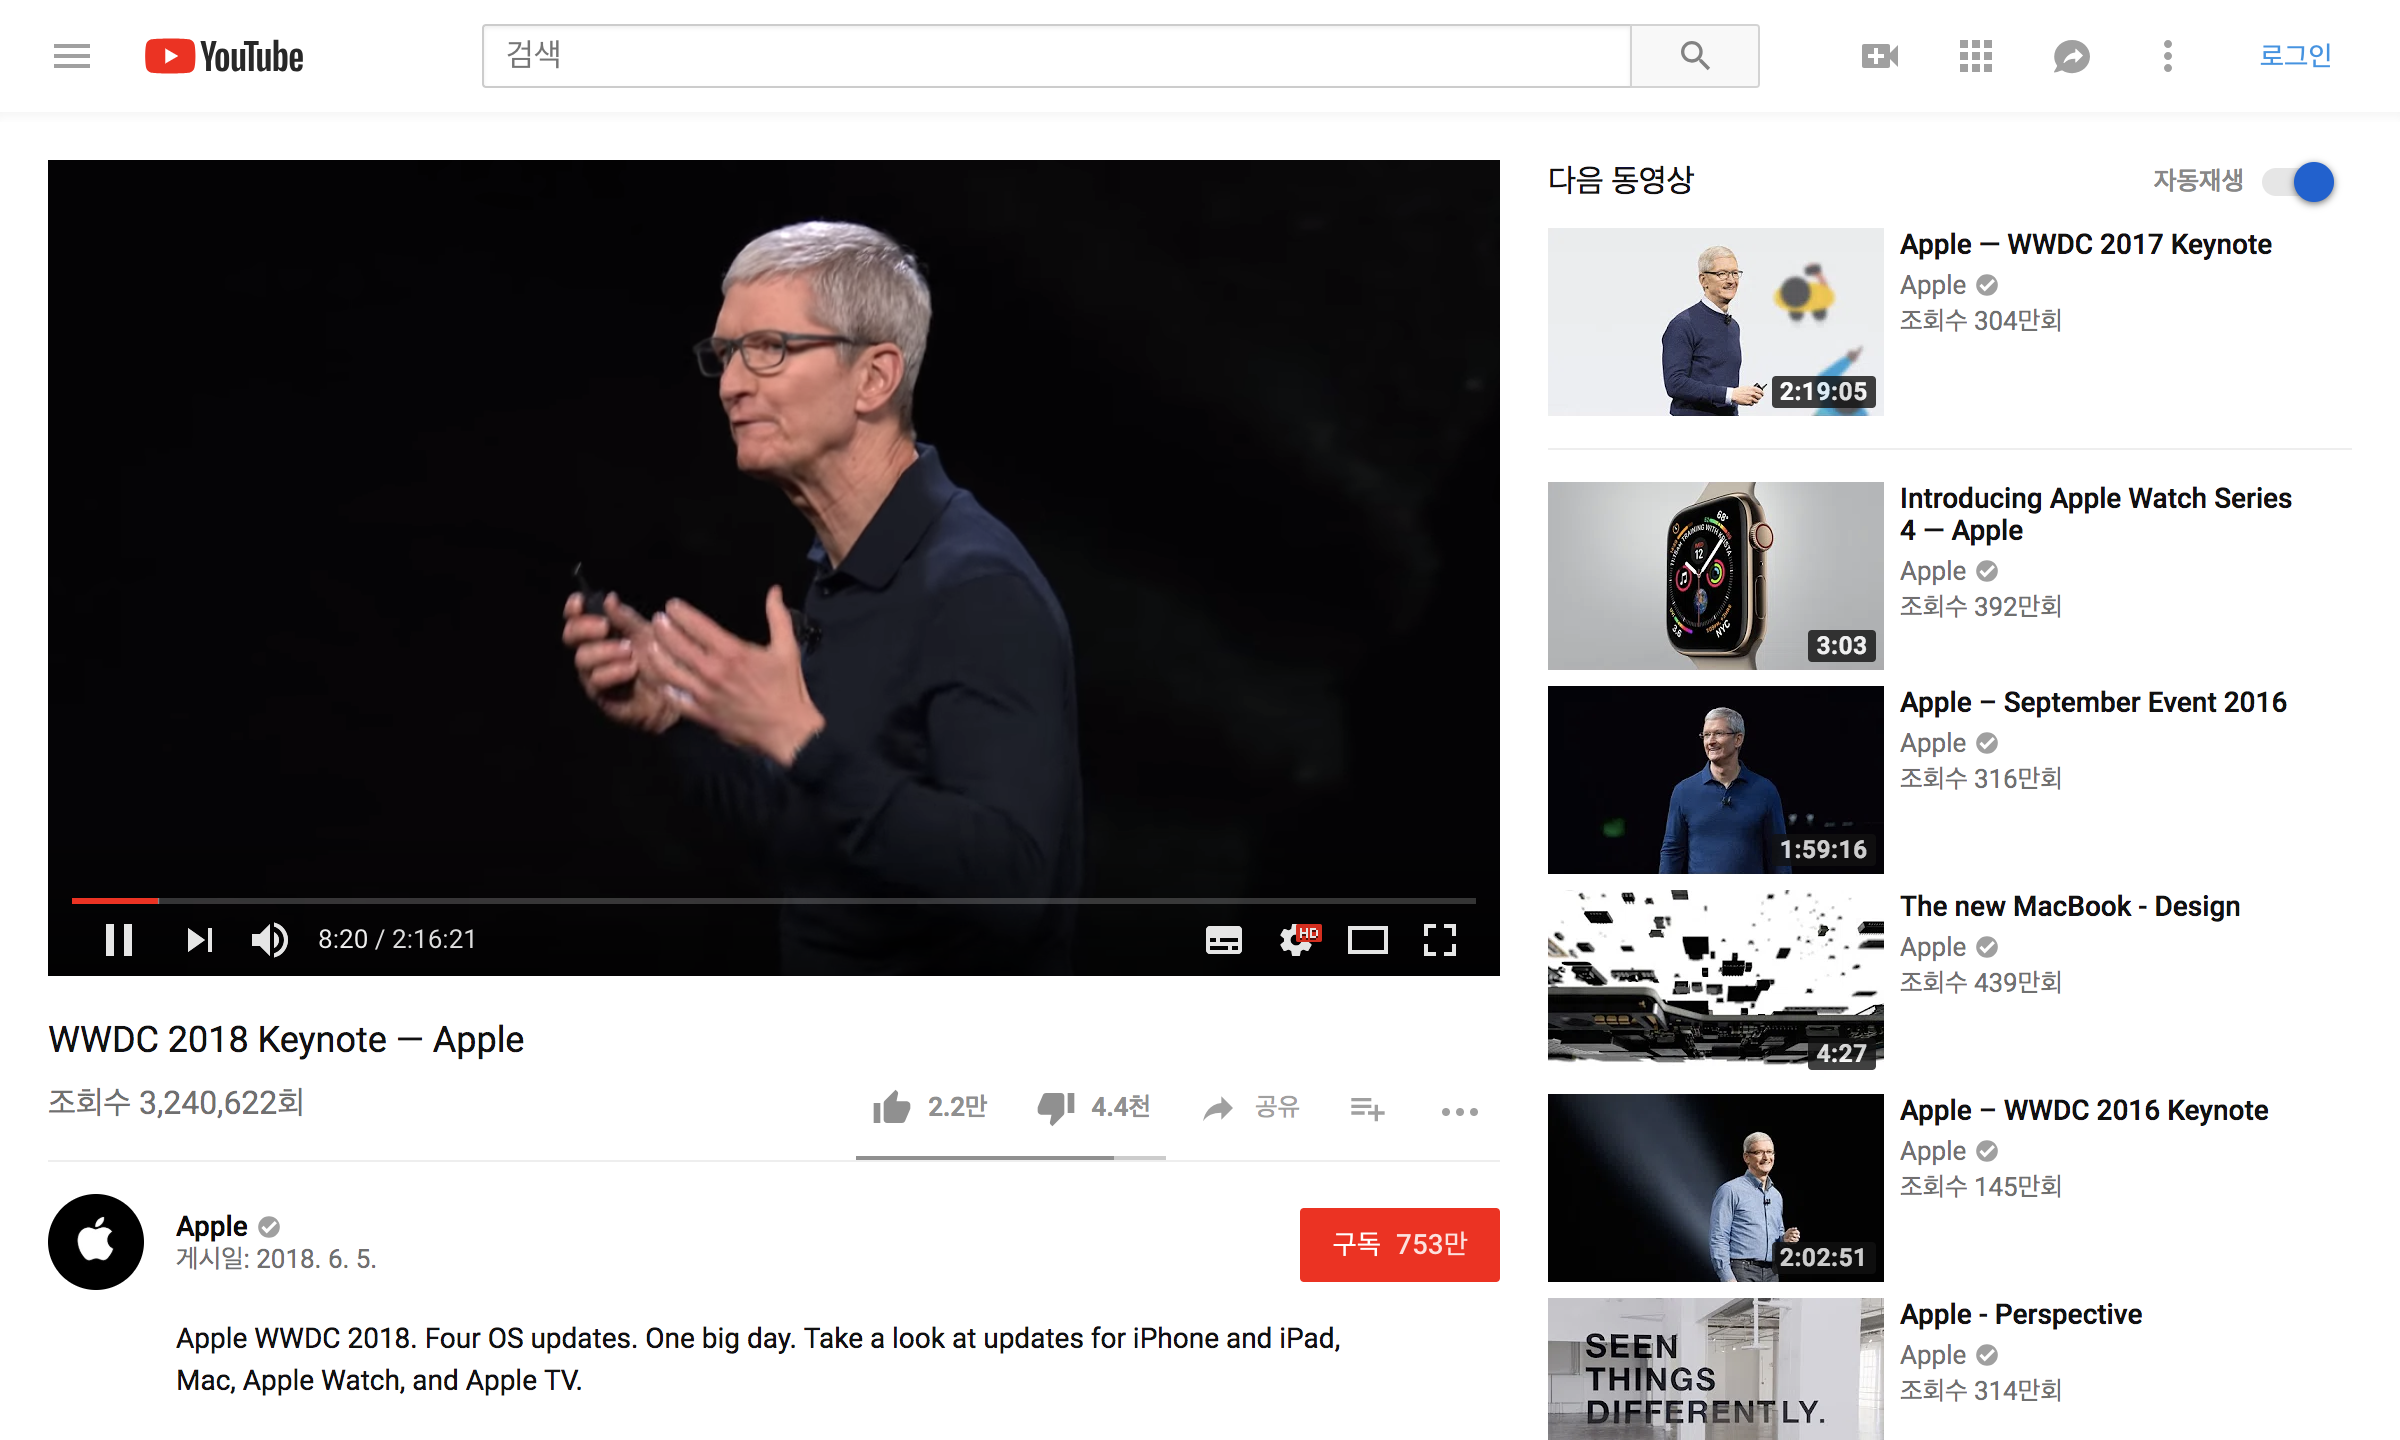

In [17]:
# 이미지 띄우기
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

### 3.4.2 특정 엘리먼트 영역의 이미지 스크린샷

- 엘리먼트의 사이즈 구하기

In [21]:
# id 가 player-container 인 엘리먼트 영역의 사이즈 구하기
driver = webdriver.Chrome()
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"
driver.get(url)

# element = driver.find_element_by_css_selector("#player-container") # 변경됨
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)

driver.quit()

{'x': 24, 'y': 80} {'height': 408, 'width': 726}


- area로 변경

In [22]:
# top, bottom, left, right
# 화면의 해상도마다 비율이 다를수 있습니다.
# 레티나 디스플레이의 경우 (*2)를 해줘야 합니다.
left = location['x'] * 2
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2
area = (left, top, right, bottom)
area

(48, 160, 1500, 976)

- 이미지를 area로 잘라주기

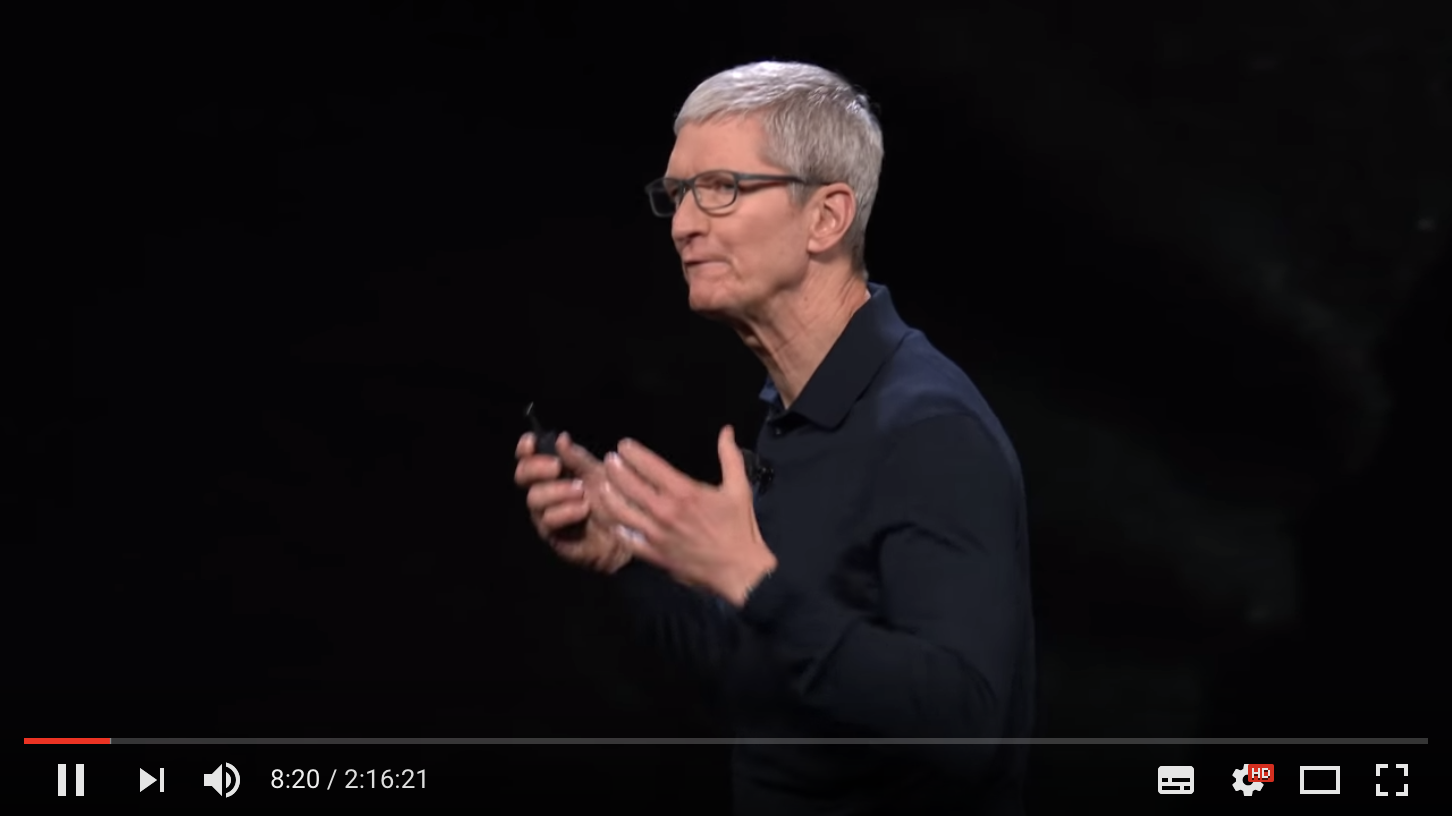

In [23]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

- 자른 이미지 저장

In [24]:
pil_im.save("screenshot_element.png")

(1452, 816)


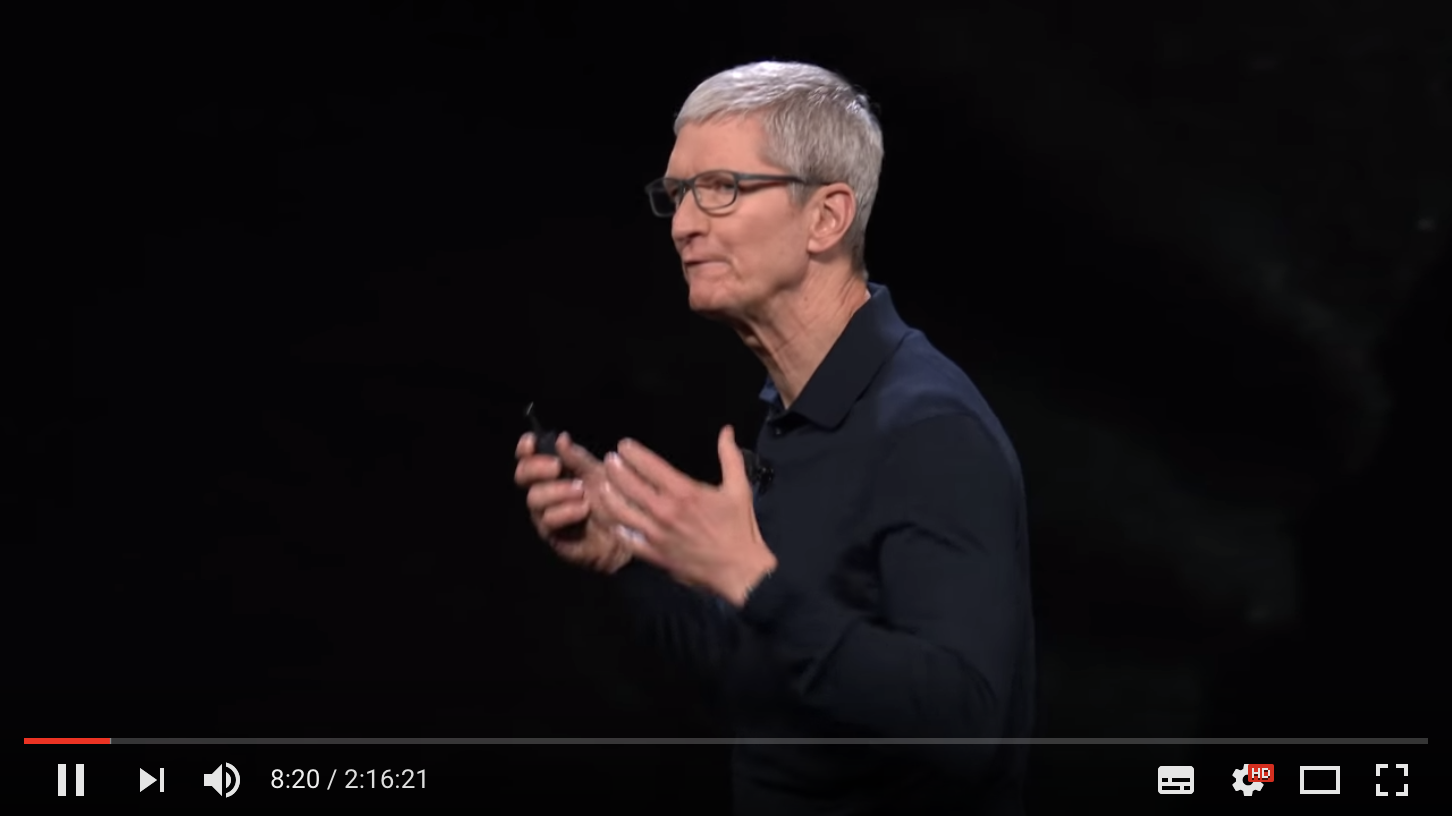

In [25]:
pil_im = pil.open("screenshot_element.png")
print(pil_im.size)
pil_im

- 하단의 재생 기능 영역 자르기

In [26]:
# 재생영역 height 사이즈 구하기
driver = webdriver.Chrome()
driver.get(url)
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
play_height = element.size["height"]
print(play_height)
driver.quit()

39


In [27]:
# area 구하기
left = location['x'] * 2
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2 - play_height * 2
area = (left, top, right, bottom)
area

(48, 160, 1500, 898)

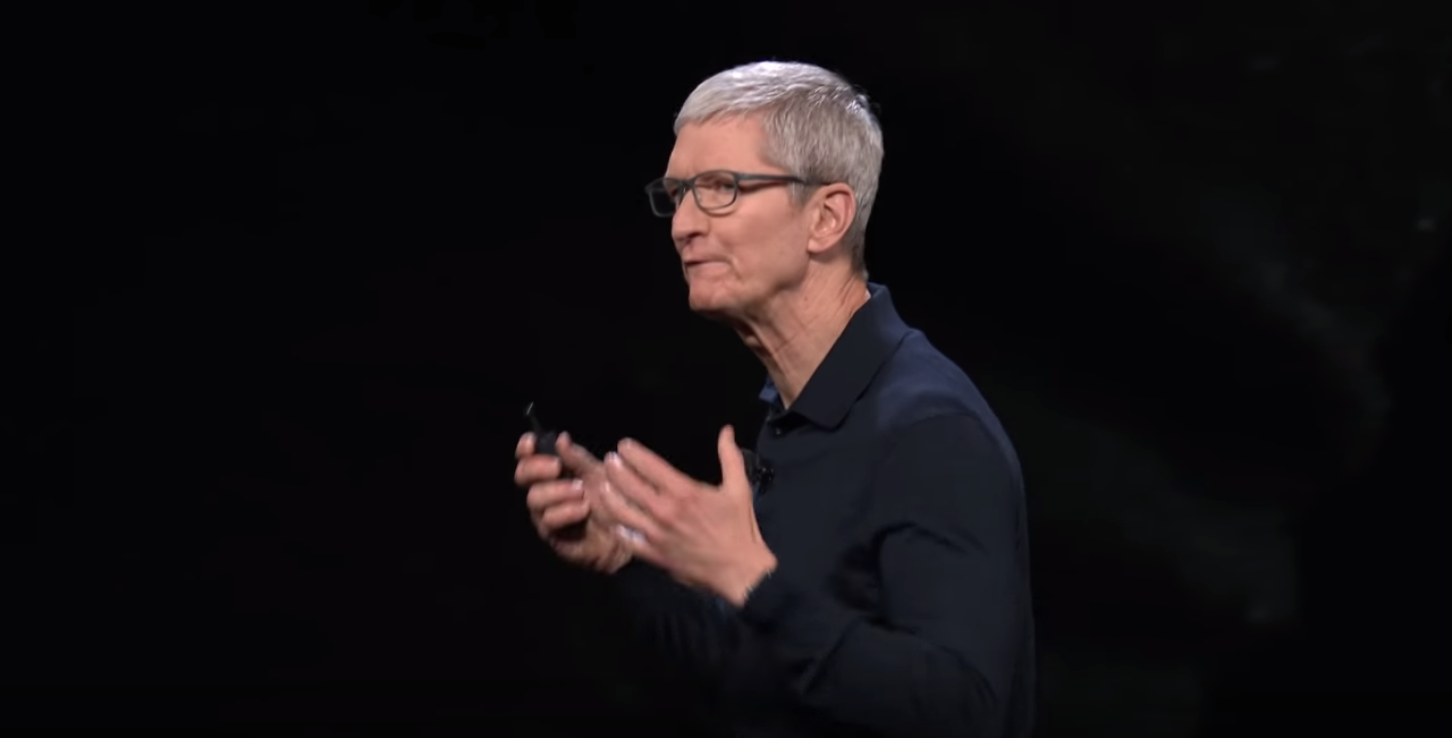

In [29]:
# area로 자르기
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

(1452, 738)


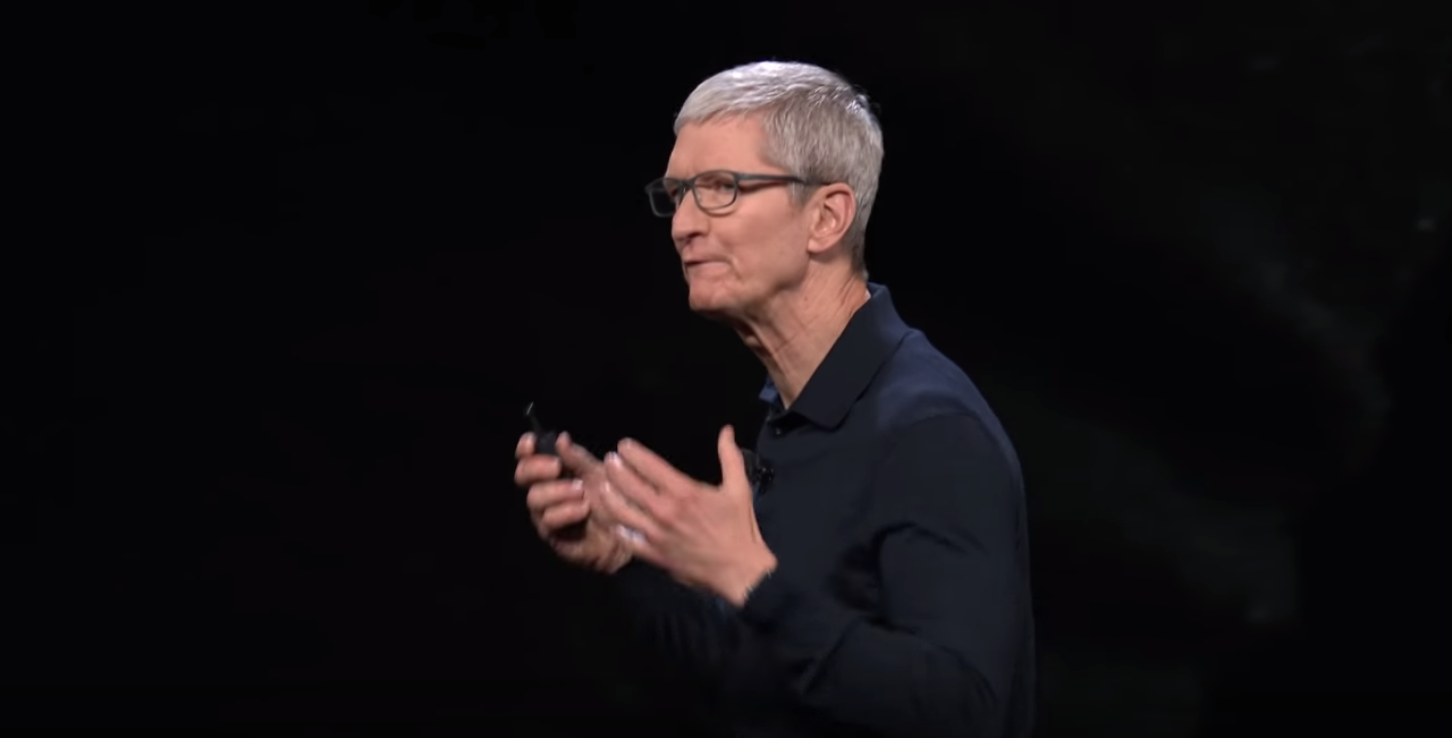

In [30]:
# 저장하기
pil_im.save("screenshot_element2.png")
pil_im = pil.open("screenshot_element2.png")
print(pil_im.size)
pil_im

- 썸네일 만들기
    - 썸네일은 비율로 줄어듭니다.
    - 머신러닝에 트레이닝 데이터를 사용할때 이미지의 사이즈가 너무 크면 트레이닝 시간이 많이 걸려 이미지를 줄여 줍니다.

In [31]:
pil_im = pil.open("screenshot_element2.png")
pil_im.size

(1452, 738)

In [32]:
pil_im.thumbnail((320, 160))
pil_im.size

(316, 160)

(316, 160)


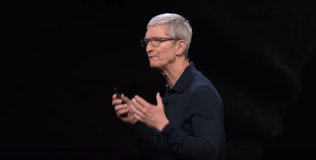

In [33]:
# 썸네일 저장하기
pil_im.save("thumnail.png")
pil_im = pil.open("thumnail.png")
print(pil_im.size)
pil_im

## 3.5 Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 띄워서 크롤링을 하는 방법으로 속도가 더 빠름
- chrome version 60 이상 부터 지원

In [34]:
# 자신의 크롬 드라이브 버전 확인하기
driver = webdriver.Chrome()
version = driver.capabilities['version']
driver.quit()
version

'69.0.3497.100'

- 패스트 캠퍼스 메인페이지 이미지 크롤링 속도 비교

In [35]:
def screenshot(url, headless=False):
    options = webdriver.ChromeOptions()
    if headless:
        options.add_argument('headless')
    options.add_argument('window-size=1920x1080')
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    driver.save_screenshot('headless.png')
    driver.quit()

In [36]:
%%time
# headless를 사용하지 않았을 경우
url = "https://www.fastcampus.co.kr/"
screenshot(url)
pil_im = pil.open('headless.png')
pil_im.thumbnail((500,500))

CPU times: user 176 ms, sys: 22.4 ms, total: 198 ms
Wall time: 5.44 s


(500, 300)


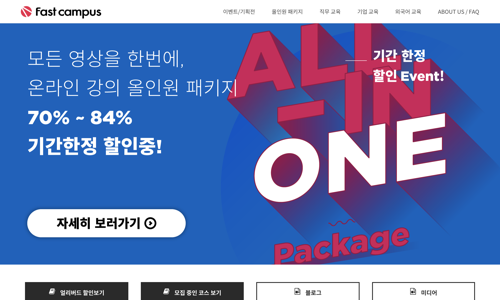

In [37]:
print(pil_im.size)
pil_im

In [38]:
%%time
# headless를 사용했을 경우
url = "https://www.fastcampus.co.kr/"
screenshot(url, True)
pil_im = pil.open('headless.png')
pil_im.thumbnail((500,500))

CPU times: user 315 ms, sys: 35.3 ms, total: 350 ms
Wall time: 4.66 s


(500, 281)


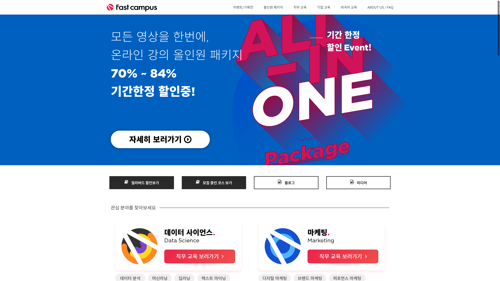

In [39]:
print(pil_im.size)
pil_im

## 3.6 Header 설정
- fake agent 사용

- 서버에서는 동일한 agent로 비정상적으로 요청이 들어오면 어뷰징으로 의심을하여 사용을 차단 합니다.

In [40]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'

In [41]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'

In [42]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'

- install fake useragent
    - pip3 install fake-useragent

In [43]:
!pip3 list | grep fake

fake-useragent            0.1.10    


In [44]:
from fake_useragent import UserAgent

In [45]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36'

In [46]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'

In [47]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.14 (KHTML, like Gecko) Chrome/24.0.1292.0 Safari/537.14'

## 3.7 파일 다운로드
- response의 iter_content함수를 이용하여 파일을 다운 받을수 있습니다.

In [58]:
!mkdir data

In [59]:
def download(title, download_link):
    response = requests.get(download_link, stream=True)
    download_path = "./data/" + title
    size = 0
    with open(download_path, 'wb') as f:
        print(download_path)
        for chunk in response.iter_content(chunk_size=1024): 
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [60]:
title = "iPhone X is Here — Apple.mp4"
download_link = "http://bit.ly/2FLpRF9"
size = download(title, download_link)
print("download done : {} Mbyte".format(round(size/1024/1024,2)))

download
./data/iPhone X is Here — Apple.mp4
download done : 0.0 Mbyte


In [62]:
%%time
title = "Apple’s big news in 108 seconds — Apple"
download_link = "https://r8---sn-upoxu-25gz.googlevideo.com/videoplayback?ms=au%2Crdu&mv=m&dur=219.892&source=youtube&pl=20&mime=video%2Fmp4&ip=195.143.245.106&sparams=dur%2Cei%2Cid%2Cinitcwndbps%2Cip%2Cipbits%2Citag%2Clmt%2Cmime%2Cmm%2Cmn%2Cms%2Cmv%2Cpl%2Cratebypass%2Crequiressl%2Csource%2Cexpire&initcwndbps=1142500&key=yt6&id=o-APthMRY_XiuYq0DIEv3J-X08BWrYWcs5d70UAiorzO-L&mn=sn-upoxu-25gz%2Csn-4g5e6nsd&c=WEB&ipbits=0&mm=31%2C29&itag=22&lmt=1508740010387336&mt=1540425467&requiressl=yes&expire=1540447151&fvip=5&ratebypass=yes&signature=7450BB63CC684C7AC5694DA22DC5AED19E663BFF.371CF43D488471354DEFD61F8678FCC960846AEE&ei=TwfRW7PIJ9rO1gad07GICw&video_id=apGuVR3iJqk&title=iPhone+X+-+Introducing+iPhone+X+-+Apple"
size = download(title, download_link)
print("download done : {} Mbyte".format(round(size/1024/1024,2)))

download
./data/Apple’s big news in 108 seconds — Apple
1024
2048
3072
4096
5120
6144
7168
8192
9216
10240
11264
12288
13312
14336
15360
16384
17408
18432
19456
20480
21504
22528
23552
24576
25600
26624
27648
28672
29696
30720
31744
32768
33792
34816
35840
36864
37888
38912
39936
40960
41984
43008
44032
45056
46080
47104
48128
49152
50176
51200
52224
53248
54272
55296
56320
57344
58368
59392
60416
61440
62464
63488
64512
65536
66560
67584
68608
69632
70656
71680
72704
73728
74752
75776
76800
77824
78848
79872
80896
81920
82944
83968
84992
86016
87040
88064
89088
90112
91136
92160
93184
94208
95232
96256
97280
98304
99328
100352
101376
102400
103424
104448
105472
106496
107520
108544
109568
110592
111616
112640
113664
114688
115712
116736
117760
118784
119808
120832
121856
122880
123904
124928
125952
126976
128000
129024
130048
131072
132096
133120
134144
135168
136192
137216
138240
139264
140288
141312
142336
143360
144384
145408
146432
147456
148480
149504
150528
151552
152576
153600


1370112
1371136
1372160
1373184
1374208
1375232
1376256
1377280
1378304
1379328
1380352
1381376
1382400
1383424
1384448
1385472
1386496
1387520
1388544
1389568
1390592
1391616
1392640
1393664
1394688
1395712
1396736
1397760
1398784
1399808
1400832
1401856
1402880
1403904
1404928
1405952
1406976
1408000
1409024
1410048
1411072
1412096
1413120
1414144
1415168
1416192
1417216
1418240
1419264
1420288
1421312
1422336
1423360
1424384
1425408
1426432
1427456
1428480
1429504
1430528
1431552
1432576
1433600
1434624
1435648
1436672
1437696
1438720
1439744
1440768
1441792
1442816
1443840
1444864
1445888
1446912
1447936
1448960
1449984
1451008
1452032
1453056
1454080
1455104
1456128
1457152
1458176
1459200
1460224
1461248
1462272
1463296
1464320
1465344
1466368
1467392
1468416
1469440
1470464
1471488
1472512
1473536
1474560
1475584
1476608
1477632
1478656
1479680
1480704
1481728
1482752
1483776
1484800
1485824
1486848
1487872
1488896
1489920
1490944
1491968
1492992
1494016
1495040
1496064
1497088


2973696
2974720
2975744
2976768
2977792
2978816
2979840
2980864
2981888
2982912
2983936
2984960
2985984
2987008
2988032
2989056
2990080
2991104
2992128
2993152
2994176
2995200
2996224
2997248
2998272
2999296
3000320
3001344
3002368
3003392
3004416
3005440
3006464
3007488
3008512
3009536
3010560
3011584
3012608
3013632
3014656
3015680
3016704
3017728
3018752
3019776
3020800
3021824
3022848
3023872
3024896
3025920
3026944
3027968
3028992
3030016
3031040
3032064
3033088
3034112
3035136
3036160
3037184
3038208
3039232
3040256
3041280
3042304
3043328
3044352
3045376
3046400
3047424
3048448
3049472
3050496
3051520
3052544
3053568
3054592
3055616
3056640
3057664
3058688
3059712
3060736
3061760
3062784
3063808
3064832
3065856
3066880
3067904
3068928
3069952
3070976
3072000
3073024
3074048
3075072
3076096
3077120
3078144
3079168
3080192
3081216
3082240
3083264
3084288
3085312
3086336
3087360
3088384
3089408
3090432
3091456
3092480
3093504
3094528
3095552
3096576
3097600
3098624
3099648
3100672


4136960
4137984
4139008
4140032
4141056
4142080
4143104
4144128
4145152
4146176
4147200
4148224
4149248
4150272
4151296
4152320
4153344
4154368
4155392
4156416
4157440
4158464
4159488
4160512
4161536
4162560
4163584
4164608
4165632
4166656
4167680
4168704
4169728
4170752
4171776
4172800
4173824
4174848
4175872
4176896
4177920
4178944
4179968
4180992
4182016
4183040
4184064
4185088
4186112
4187136
4188160
4189184
4190208
4191232
4192256
4193280
4194304
4195328
4196352
4197376
4198400
4199424
4200448
4201472
4202496
4203520
4204544
4205568
4206592
4207616
4208640
4209664
4210688
4211712
4212736
4213760
4214784
4215808
4216832
4217856
4218880
4219904
4220928
4221952
4222976
4224000
4225024
4226048
4227072
4228096
4229120
4230144
4231168
4232192
4233216
4234240
4235264
4236288
4237312
4238336
4239360
4240384
4241408
4242432
4243456
4244480
4245504
4246528
4247552
4248576
4249600
4250624
4251648
4252672
4253696
4254720
4255744
4256768
4257792
4258816
4259840
4260864
4261888
4262912
4263936


5274624
5275648
5276672
5277696
5278720
5279744
5280768
5281792
5282816
5283840
5284864
5285888
5286912
5287936
5288960
5289984
5291008
5292032
5293056
5294080
5295104
5296128
5297152
5298176
5299200
5300224
5301248
5302272
5303296
5304320
5305344
5306368
5307392
5308416
5309440
5310464
5311488
5312512
5313536
5314560
5315584
5316608
5317632
5318656
5319680
5320704
5321728
5322752
5323776
5324800
5325824
5326848
5327872
5328896
5329920
5330944
5331968
5332992
5334016
5335040
5336064
5337088
5338112
5339136
5340160
5341184
5342208
5343232
5344256
5345280
5346304
5347328
5348352
5349376
5350400
5351424
5352448
5353472
5354496
5355520
5356544
5357568
5358592
5359616
5360640
5361664
5362688
5363712
5364736
5365760
5366784
5367808
5368832
5369856
5370880
5371904
5372928
5373952
5374976
5376000
5377024
5378048
5379072
5380096
5381120
5382144
5383168
5384192
5385216
5386240
5387264
5388288
5389312
5390336
5391360
5392384
5393408
5394432
5395456
5396480
5397504
5398528
5399552
5400576
5401600


6346752
6347776
6348800
6349824
6350848
6351872
6352896
6353920
6354944
6355968
6356992
6358016
6359040
6360064
6361088
6362112
6363136
6364160
6365184
6366208
6367232
6368256
6369280
6370304
6371328
6372352
6373376
6374400
6375424
6376448
6377472
6378496
6379520
6380544
6381568
6382592
6383616
6384640
6385664
6386688
6387712
6388736
6389760
6390784
6391808
6392832
6393856
6394880
6395904
6396928
6397952
6398976
6400000
6401024
6402048
6403072
6404096
6405120
6406144
6407168
6408192
6409216
6410240
6411264
6412288
6413312
6414336
6415360
6416384
6417408
6418432
6419456
6420480
6421504
6422528
6423552
6424576
6425600
6426624
6427648
6428672
6429696
6430720
6431744
6432768
6433792
6434816
6435840
6436864
6437888
6438912
6439936
6440960
6441984
6443008
6444032
6445056
6446080
6447104
6448128
6449152
6450176
6451200
6452224
6453248
6454272
6455296
6456320
6457344
6458368
6459392
6460416
6461440
6462464
6463488
6464512
6465536
6466560
6467584
6468608
6469632
6470656
6471680
6472704
6473728


7575552
7576576
7577600
7578624
7579648
7580672
7581696
7582720
7583744
7584768
7585792
7586816
7587840
7588864
7589888
7590912
7591936
7592960
7593984
7595008
7596032
7597056
7598080
7599104
7600128
7601152
7602176
7603200
7604224
7605248
7606272
7607296
7608320
7609344
7610368
7611392
7612416
7613440
7614464
7615488
7616512
7617536
7618560
7619584
7620608
7621632
7622656
7623680
7624704
7625728
7626752
7627776
7628800
7629824
7630848
7631872
7632896
7633920
7634944
7635968
7636992
7638016
7639040
7640064
7641088
7642112
7643136
7644160
7645184
7646208
7647232
7648256
7649280
7650304
7651328
7652352
7653376
7654400
7655424
7656448
7657472
7658496
7659520
7660544
7661568
7662592
7663616
7664640
7665664
7666688
7667712
7668736
7669760
7670784
7671808
7672832
7673856
7674880
7675904
7676928
7677952
7678976
7680000
7681024
7682048
7683072
7684096
7685120
7686144
7687168
7688192
7689216
7690240
7691264
7692288
7693312
7694336
7695360
7696384
7697408
7698432
7699456
7700480
7701504
7702528


8924160
8925184
8926208
8927232
8928256
8929280
8930304
8931328
8932352
8933376
8934400
8935424
8936448
8937472
8938496
8939520
8940544
8941568
8942592
8943616
8944640
8945664
8946688
8947712
8948736
8949760
8950784
8951808
8952832
8953856
8954880
8955904
8956928
8957952
8958976
8960000
8961024
8962048
8963072
8964096
8965120
8966144
8967168
8968192
8969216
8970240
8971264
8972288
8973312
8974336
8975360
8976384
8977408
8978432
8979456
8980480
8981504
8982528
8983552
8984576
8985600
8986624
8987648
8988672
8989696
8990720
8991744
8992768
8993792
8994816
8995840
8996864
8997888
8998912
8999936
9000960
9001984
9003008
9004032
9005056
9006080
9007104
9008128
9009152
9010176
9011200
9012224
9013248
9014272
9015296
9016320
9017344
9018368
9019392
9020416
9021440
9022464
9023488
9024512
9025536
9026560
9027584
9028608
9029632
9030656
9031680
9032704
9033728
9034752
9035776
9036800
9037824
9038848
9039872
9040896
9041920
9042944
9043968
9044992
9046016
9047040
9048064
9049088
9050112
9051136


10321920
10322944
10323968
10324992
10326016
10327040
10328064
10329088
10330112
10331136
10332160
10333184
10334208
10335232
10336256
10337280
10338304
10339328
10340352
10341376
10342400
10343424
10344448
10345472
10346496
10347520
10348544
10349568
10350592
10351616
10352640
10353664
10354688
10355712
10356736
10357760
10358784
10359808
10360832
10361856
10362880
10363904
10364928
10365952
10366976
10368000
10369024
10370048
10371072
10372096
10373120
10374144
10375168
10376192
10377216
10378240
10379264
10380288
10381312
10382336
10383360
10384384
10385408
10386432
10387456
10388480
10389504
10390528
10391552
10392576
10393600
10394624
10395648
10396672
10397696
10398720
10399744
10400768
10401792
10402816
10403840
10404864
10405888
10406912
10407936
10408960
10409984
10411008
10412032
10413056
10414080
10415104
10416128
10417152
10418176
10419200
10420224
10421248
10422272
10423296
10424320
10425344
10426368
10427392
10428416
10429440
10430464
10431488
10432512
10433536
10434560
1

11721728
11722752
11723776
11724800
11725824
11726848
11727872
11728896
11729920
11730944
11731968
11732992
11734016
11735040
11736064
11737088
11738112
11739136
11740160
11741184
11742208
11743232
11744256
11745280
11746304
11747328
11748352
11749376
11750400
11751424
11752448
11753472
11754496
11755520
11756544
11757568
11758592
11759616
11760640
11761664
11762688
11763712
11764736
11765760
11766784
11767808
11768832
11769856
11770880
11771904
11772928
11773952
11774976
11776000
11777024
11778048
11779072
11780096
11781120
11782144
11783168
11784192
11785216
11786240
11787264
11788288
11789312
11790336
11791360
11792384
11793408
11794432
11795456
11796480
11797504
11798528
11799552
11800576
11801600
11802624
11803648
11804672
11805696
11806720
11807744
11808768
11809792
11810816
11811840
11812864
11813888
11814912
11815936
11816960
11817984
11819008
11820032
11821056
11822080
11823104
11824128
11825152
11826176
11827200
11828224
11829248
11830272
11831296
11832320
11833344
11834368
1

13136896
13137920
13138944
13139968
13140992
13142016
13143040
13144064
13145088
13146112
13147136
13148160
13149184
13150208
13151232
13152256
13153280
13154304
13155328
13156352
13157376
13158400
13159424
13160448
13161472
13162496
13163520
13164544
13165568
13166592
13167616
13168640
13169664
13170688
13171712
13172736
13173760
13174784
13175808
13176832
13177856
13178880
13179904
13180928
13181952
13182976
13184000
13185024
13186048
13187072
13188096
13189120
13190144
13191168
13192192
13193216
13194240
13195264
13196288
13197312
13198336
13199360
13200384
13201408
13202432
13203456
13204480
13205504
13206528
13207552
13208576
13209600
13210624
13211648
13212672
13213696
13214720
13215744
13216768
13217792
13218816
13219840
13220864
13221888
13222912
13223936
13224960
13225984
13227008
13228032
13229056
13230080
13231104
13232128
13233152
13234176
13235200
13236224
13237248
13238272
13239296
13240320
13241344
13242368
13243392
13244416
13245440
13246464
13247488
13248512
13249536
1

14157824
14158848
14159872
14160896
14161920
14162944
14163968
14164992
14166016
14167040
14168064
14169088
14170112
14171136
14172160
14173184
14174208
14175232
14176256
14177280
14178304
14179328
14180352
14181376
14182400
14183424
14184448
14185472
14186496
14187520
14188544
14189568
14190592
14191616
14192640
14193664
14194688
14195712
14196736
14197760
14198784
14199808
14200832
14201856
14202880
14203904
14204928
14205952
14206976
14208000
14209024
14210048
14211072
14212096
14213120
14214144
14215168
14216192
14217216
14218240
14219264
14220288
14221312
14222336
14223360
14224384
14225408
14226432
14227456
14228480
14229504
14230528
14231552
14232576
14233600
14234624
14235648
14236672
14237696
14238720
14239744
14240768
14241792
14242816
14243840
14244864
14245888
14246912
14247936
14248960
14249984
14251008
14252032
14253056
14254080
14255104
14256128
14257152
14258176
14259200
14260224
14261248
14262272
14263296
14264320
14265344
14266368
14267392
14268416
14269440
14270464
1

15655936
15656960
15657984
15659008
15660032
15661056
15662080
15663104
15664128
15665152
15666176
15667200
15668224
15669248
15670272
15671296
15672320
15673344
15674368
15675392
15676416
15677440
15678464
15679488
15680512
15681536
15682560
15683584
15684608
15685632
15686656
15687680
15688704
15689728
15690752
15691776
15692800
15693824
15694848
15695872
15696896
15697920
15698944
15699968
15700992
15702016
15703040
15704064
15705088
15706112
15707136
15708160
15709184
15710208
15711232
15712256
15713280
15714304
15715328
15716352
15717376
15718400
15719424
15720448
15721472
15722496
15723520
15724544
15725568
15726592
15727616
15728640
15729664
15730688
15731712
15732736
15733760
15734784
15735808
15736832
15737856
15738880
15739904
15740928
15741952
15742976
15744000
15745024
15746048
15747072
15748096
15749120
15750144
15751168
15752192
15753216
15754240
15755264
15756288
15757312
15758336
15759360
15760384
15761408
15762432
15763456
15764480
15765504
15766528
15767552
15768576
1

16933888
16934912
16935936
16936960
16937984
16939008
16940032
16941056
16942080
16943104
16944128
16945152
16946176
16947200
16948224
16949248
16950272
16951296
16952320
16953344
16954368
16955392
16956416
16957440
16958464
16959488
16960512
16961536
16962560
16963584
16964608
16965632
16966656
16967680
16968704
16969728
16970752
16971776
16972800
16973824
16974848
16975872
16976896
16977920
16978944
16979968
16980992
16982016
16983040
16984064
16985088
16986112
16987136
16988160
16989184
16990208
16991232
16992256
16993280
16994304
16995328
16996352
16997376
16998400
16999424
17000448
17001472
17002496
17003520
17004544
17005568
17006592
17007616
17008640
17009664
17010688
17011712
17012736
17013760
17014784
17015808
17016832
17017856
17018880
17019904
17020928
17021952
17022976
17024000
17025024
17026048
17027072
17028096
17029120
17030144
17031168
17032192
17033216
17034240
17035264
17036288
17037312
17038336
17039360
17040384
17041408
17042432
17043456
17044480
17045504
17046528
1

18567168
18568192
18569216
18570240
18571264
18572288
18573312
18574336
18575360
18576384
18577408
18578432
18579456
18580480
18581504
18582528
18583552
18584576
18585600
18586624
18587648
18588672
18589696
18590720
18591744
18592768
18593792
18594816
18595840
18596864
18597888
18598912
18599936
18600960
18601984
18603008
18604032
18605056
18606080
18607104
18608128
18609152
18610176
18611200
18612224
18613248
18614272
18615296
18616320
18617344
18618368
18619392
18620416
18621440
18622464
18623488
18624512
18625536
18626560
18627584
18628608
18629632
18630656
18631680
18632704
18633728
18634752
18635776
18636800
18637824
18638848
18639872
18640896
18641920
18642944
18643968
18644992
18646016
18647040
18648064
18649088
18650112
18651136
18652160
18653184
18654208
18655232
18656256
18657280
18658304
18659328
18660352
18661376
18662400
18663424
18664448
18665472
18666496
18667520
18668544
18669568
18670592
18671616
18672640
18673664
18674688
18675712
18676736
18677760
18678784
18679808
1

19915776
19916800
19917824
19918848
19919872
19920896
19921920
19922944
19923968
19924992
19926016
19927040
19928064
19929088
19930112
19931136
19932160
19933184
19934208
19935232
19936256
19937280
19938304
19939328
19940352
19941376
19942400
19943424
19944448
19945472
19946496
19947520
19948544
19949568
19950592
19951616
19952640
19953664
19954688
19955712
19956736
19957760
19958784
19959808
19960832
19961856
19962880
19963904
19964928
19965952
19966976
19968000
19969024
19970048
19971072
19972096
19973120
19974144
19975168
19976192
19977216
19978240
19979264
19980288
19981312
19982336
19983360
19984384
19985408
19986432
19987456
19988480
19989504
19990528
19991552
19992576
19993600
19994624
19995648
19996672
19997696
19998720
19999744
20000768
20001792
20002816
20003840
20004864
20005888
20006912
20007936
20008960
20009984
20011008
20012032
20013056
20014080
20015104
20016128
20017152
20018176
20019200
20020224
20021248
20022272
20023296
20024320
20025344
20026368
20027392
20028416
2

21832704
21833728
21834752
21835776
21836800
21837824
21838848
21839872
21840896
21841920
21842944
21843968
21844992
21846016
21847040
21848064
21849088
21850112
21851136
21852160
21853184
21854208
21855232
21856256
21857280
21858304
21859328
21860352
21861376
21862400
21863424
21864448
21865472
21866496
21867520
21868544
21869568
21870592
21871616
21872640
21873664
21874688
21875712
21876736
21877760
21878784
21879808
21880832
21881856
21882880
21883904
21884928
21885952
21886976
21888000
21889024
21890048
21891072
21892096
21893120
21894144
21895168
21896192
21897216
21898240
21899264
21900288
21901312
21902336
21903360
21904384
21905408
21906432
21907456
21908480
21909504
21910528
21911552
21912576
21913600
21914624
21915648
21916672
21917696
21918720
21919744
21920768
21921792
download done : 20.91 Mbyte
CPU times: user 3.39 s, sys: 924 ms, total: 4.31 s
Wall time: 15.5 s
